In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!ls /content/drive/MyDrive/BDM/

artist_info_final.csv


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
file_path = '/content/drive/MyDrive/BDM/artist_info_final.csv'

data = pd.read_csv(file_path)
data


,Unnamed: 0,Name,MBID,similar_artist,listeners,play_counts,tags,summary,top_album,Unnamed: 9,top_songs
0,0,Nirvana,9282c8b4-ca0b-4c6b-b7e3-4f7762dfc4d6,"['Kurt Cobain', 'Alice in Chains', 'Soundgarde...",6297168,418658293,"['Grunge', 'rock', 'alternative', 'alternative...","There are multiple artists tracked as ""Nirvana...","Nevermind, In Utero, MTV Unplugged in New York...",NaN,"Smells Like Teen Spirit, Come as You Are, Lith..."
1,1,The Killers,95e1ead9-4d31-4808-a7ac-32c3614c116b,"['Brandon Flowers', 'Kings of Leon', 'Snow Pat...",5950326,291647767,"['indie', 'rock', 'indie rock', 'alternative',...",There are multiple artists using this name:\n\...,"Hot Fuss, Sam's Town, Day & Age, Sawdust, Dire...",NaN,"Mr. Brightside, Somebody Told Me, When You Wer..."
2,2,Radiohead,a74b1b7f-71a5-4011-9441-d0b5e4122711,"['Thom Yorke', 'Atoms for Peace', 'Jeff Buckle...",6815000,928426766,"['alternative', 'alternative rock', 'rock', 'i...",Radiohead are an English rock band formed in A...,"OK Computer, In Rainbows, Pablo Honey, The Ben...",NaN,"Creep, Karma Police, No Surprises, Paranoid An..."
3,3,Gorillaz,e21857d5-3256-4547-afb3-4b6ded592596,"['Damon Albarn', 'The Good, the Bad & the Quee...",5617912,363054163,"['alternative', 'electronic', 'Hip-Hop', 'rock...",Gorillaz are a British virtual band created in...,"Demon Days, Gorillaz, Plastic Beach, Humanz (D...",NaN,"Feel Good Inc., Clint Eastwood, DARE, On Melan..."
4,4,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,"['Keane', 'Imagine Dragons', 'Snow Patrol', 'T...",7710436,592812260,"['rock', 'alternative', 'britpop', 'alternativ...",Coldplay are a britpop band formed in London i...,"Parachutes, A Rush of Blood to the Head, Viva ...",NaN,"Yellow, Viva la Vida, The Scientist, Clocks, F..."
...,...,...,...,...,...,...,...,...,...,...,...
11772,11772,The Ordinary Boys,69b50aed-f122-4c45-aba9-863043f5b513,"['The Futureheads', 'Hard-Fi', 'The Enemy', 'L...",216327,1930787,"['indie', 'indie rock', 'british', 'ska', 'rock']",The Ordinary Boys are an English indie rock ba...,"Over the Counter Culture, Brassbound, How To G...",NaN,"Boys Will Be Boys, I Luv U, Talk Talk Talk, Ov..."
11773,11773,Rhoda Dakar,5d678a86-6a6b-49a5-9bb7-0b19c4999859,"['Neville Staple', 'Dave & Ansell Collins', 'T...",4600,27354,"['reggae', 'ska', 'british', 'female vocalists...",Rhoda Dakar (born 1959) is a British singer an...,"The Boiler, Sings The Bodysnatchers, Version G...",NaN,"The Boiler, Theme from the Boiler, 007, The Ma..."
11774,11774,The Smithereens,fae2cd4c-f847-4cb3-b311-60c8906cdb0b,"['Guadalcanal Diary', 'BoDeans', 'Marshall Cre...",144711,1383566,"['power pop', 'rock', '80s', 'alternative', 'c...",The Smithereens are a power pop/alternative ro...,"Especially For You, Smithereens 11, Green Thou...",NaN,"A Girl Like You, Blood And Roses, Behind the W..."
11775,11775,Gruff Rhys,254caf14-7b63-47d1-aa9f-acc7cb541814,"['Super Furry Animals', 'Bill Ryder-Jones', 'N...",136720,2293498,"['indie', 'seen live', 'welsh', 'singer-songwr...",Gruff Rhys is the lead singer of the Welsh ban...,"Hotel Shampoo, American Interior, Candylion, S...",NaN,"Shark Ridden Waters, Candylion, American Inter..."


In [13]:
# prompt: Drop the unnamed: 9 column: Since its just blank column

if 'Unnamed: 9' in data.columns:
  data = data.drop('Unnamed: 9', axis=1)

In [14]:
# prompt: Rename Unnamed: 0	column to S.no

data = data.rename(columns={'Unnamed: 0': 'S.no'})
data

,S.no,Name,MBID,similar_artist,listeners,play_counts,tags,summary,top_album,top_songs
0,0,Nirvana,9282c8b4-ca0b-4c6b-b7e3-4f7762dfc4d6,"['Kurt Cobain', 'Alice in Chains', 'Soundgarde...",6297168,418658293,"['Grunge', 'rock', 'alternative', 'alternative...","There are multiple artists tracked as ""Nirvana...","Nevermind, In Utero, MTV Unplugged in New York...","Smells Like Teen Spirit, Come as You Are, Lith..."
1,1,The Killers,95e1ead9-4d31-4808-a7ac-32c3614c116b,"['Brandon Flowers', 'Kings of Leon', 'Snow Pat...",5950326,291647767,"['indie', 'rock', 'indie rock', 'alternative',...",There are multiple artists using this name:\n\...,"Hot Fuss, Sam's Town, Day & Age, Sawdust, Dire...","Mr. Brightside, Somebody Told Me, When You Wer..."
2,2,Radiohead,a74b1b7f-71a5-4011-9441-d0b5e4122711,"['Thom Yorke', 'Atoms for Peace', 'Jeff Buckle...",6815000,928426766,"['alternative', 'alternative rock', 'rock', 'i...",Radiohead are an English rock band formed in A...,"OK Computer, In Rainbows, Pablo Honey, The Ben...","Creep, Karma Police, No Surprises, Paranoid An..."
3,3,Gorillaz,e21857d5-3256-4547-afb3-4b6ded592596,"['Damon Albarn', 'The Good, the Bad & the Quee...",5617912,363054163,"['alternative', 'electronic', 'Hip-Hop', 'rock...",Gorillaz are a British virtual band created in...,"Demon Days, Gorillaz, Plastic Beach, Humanz (D...","Feel Good Inc., Clint Eastwood, DARE, On Melan..."
4,4,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,"['Keane', 'Imagine Dragons', 'Snow Patrol', 'T...",7710436,592812260,"['rock', 'alternative', 'britpop', 'alternativ...",Coldplay are a britpop band formed in London i...,"Parachutes, A Rush of Blood to the Head, Viva ...","Yellow, Viva la Vida, The Scientist, Clocks, F..."
...,...,...,...,...,...,...,...,...,...,...
11772,11772,The Ordinary Boys,69b50aed-f122-4c45-aba9-863043f5b513,"['The Futureheads', 'Hard-Fi', 'The Enemy', 'L...",216327,1930787,"['indie', 'indie rock', 'british', 'ska', 'rock']",The Ordinary Boys are an English indie rock ba...,"Over the Counter Culture, Brassbound, How To G...","Boys Will Be Boys, I Luv U, Talk Talk Talk, Ov..."
11773,11773,Rhoda Dakar,5d678a86-6a6b-49a5-9bb7-0b19c4999859,"['Neville Staple', 'Dave & Ansell Collins', 'T...",4600,27354,"['reggae', 'ska', 'british', 'female vocalists...",Rhoda Dakar (born 1959) is a British singer an...,"The Boiler, Sings The Bodysnatchers, Version G...","The Boiler, Theme from the Boiler, 007, The Ma..."
11774,11774,The Smithereens,fae2cd4c-f847-4cb3-b311-60c8906cdb0b,"['Guadalcanal Diary', 'BoDeans', 'Marshall Cre...",144711,1383566,"['power pop', 'rock', '80s', 'alternative', 'c...",The Smithereens are a power pop/alternative ro...,"Especially For You, Smithereens 11, Green Thou...","A Girl Like You, Blood And Roses, Behind the W..."
11775,11775,Gruff Rhys,254caf14-7b63-47d1-aa9f-acc7cb541814,"['Super Furry Animals', 'Bill Ryder-Jones', 'N...",136720,2293498,"['indie', 'seen live', 'welsh', 'singer-songwr...",Gruff Rhys is the lead singer of the Welsh ban...,"Hotel Shampoo, American Interior, Candylion, S...","Shark Ridden Waters, Candylion, American Inter..."


In [16]:
column_summary = pd.DataFrame({
    'Column Name': data.columns,
    'Data Type': data.dtypes,
    'Non-Null Count': data.notnull().sum(),
    'Null Count': data.isnull().sum(),
    'Unique Values': data.nunique()
})

column_summary

,Column Name,Data Type,Non-Null Count,Null Count,Unique Values
S.no,S.no,int64,11777,0,11777
Name,Name,object,11777,0,11777
MBID,MBID,object,11777,0,11777
similar_artist,similar_artist,object,11777,0,11630
listeners,listeners,int64,11777,0,11647
play_counts,play_counts,int64,11777,0,11773
tags,tags,object,11777,0,11360
summary,summary,object,11777,0,11777
top_album,top_album,object,11777,0,11777
top_songs,top_songs,object,11777,0,11777


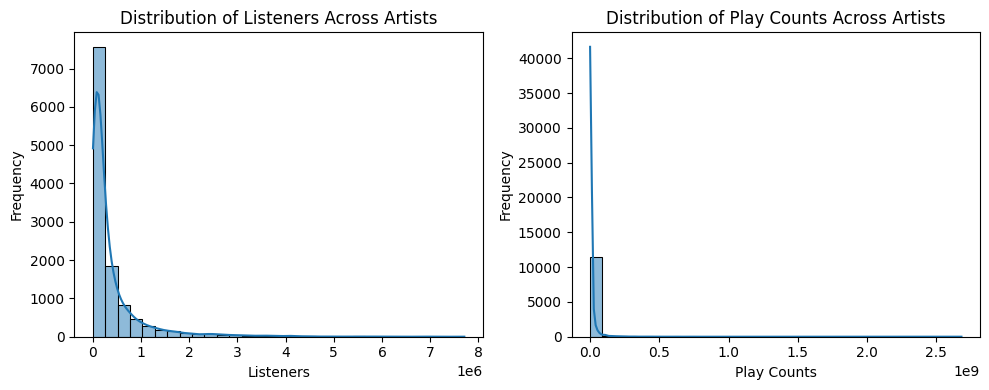

In [24]:
# Artist Popularity Distribution

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Create a figure with 2 side-by-side subplots

# Listeners distribution
sns.histplot(data['listeners'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Listeners Across Artists')
axes[0].set_xlabel('Listeners')
axes[0].set_ylabel('Frequency')

# Play counts distribution
sns.histplot(data['play_counts'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Play Counts Across Artists')
axes[1].set_xlabel('Play Counts')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



Significance: This plot shows how listener counts and play counts are distributed across artists, revealing the skewness of popularity.

Background: In music data, popularity often follows a power-law distribution, with a few artists being extremely popular and many having moderate to low popularity.

Interpretation:

A long tail in the distribution suggests that most artists have fewer listeners, while a few dominate.
Peaks or clusters indicate popular listener counts or play counts across multiple artists.

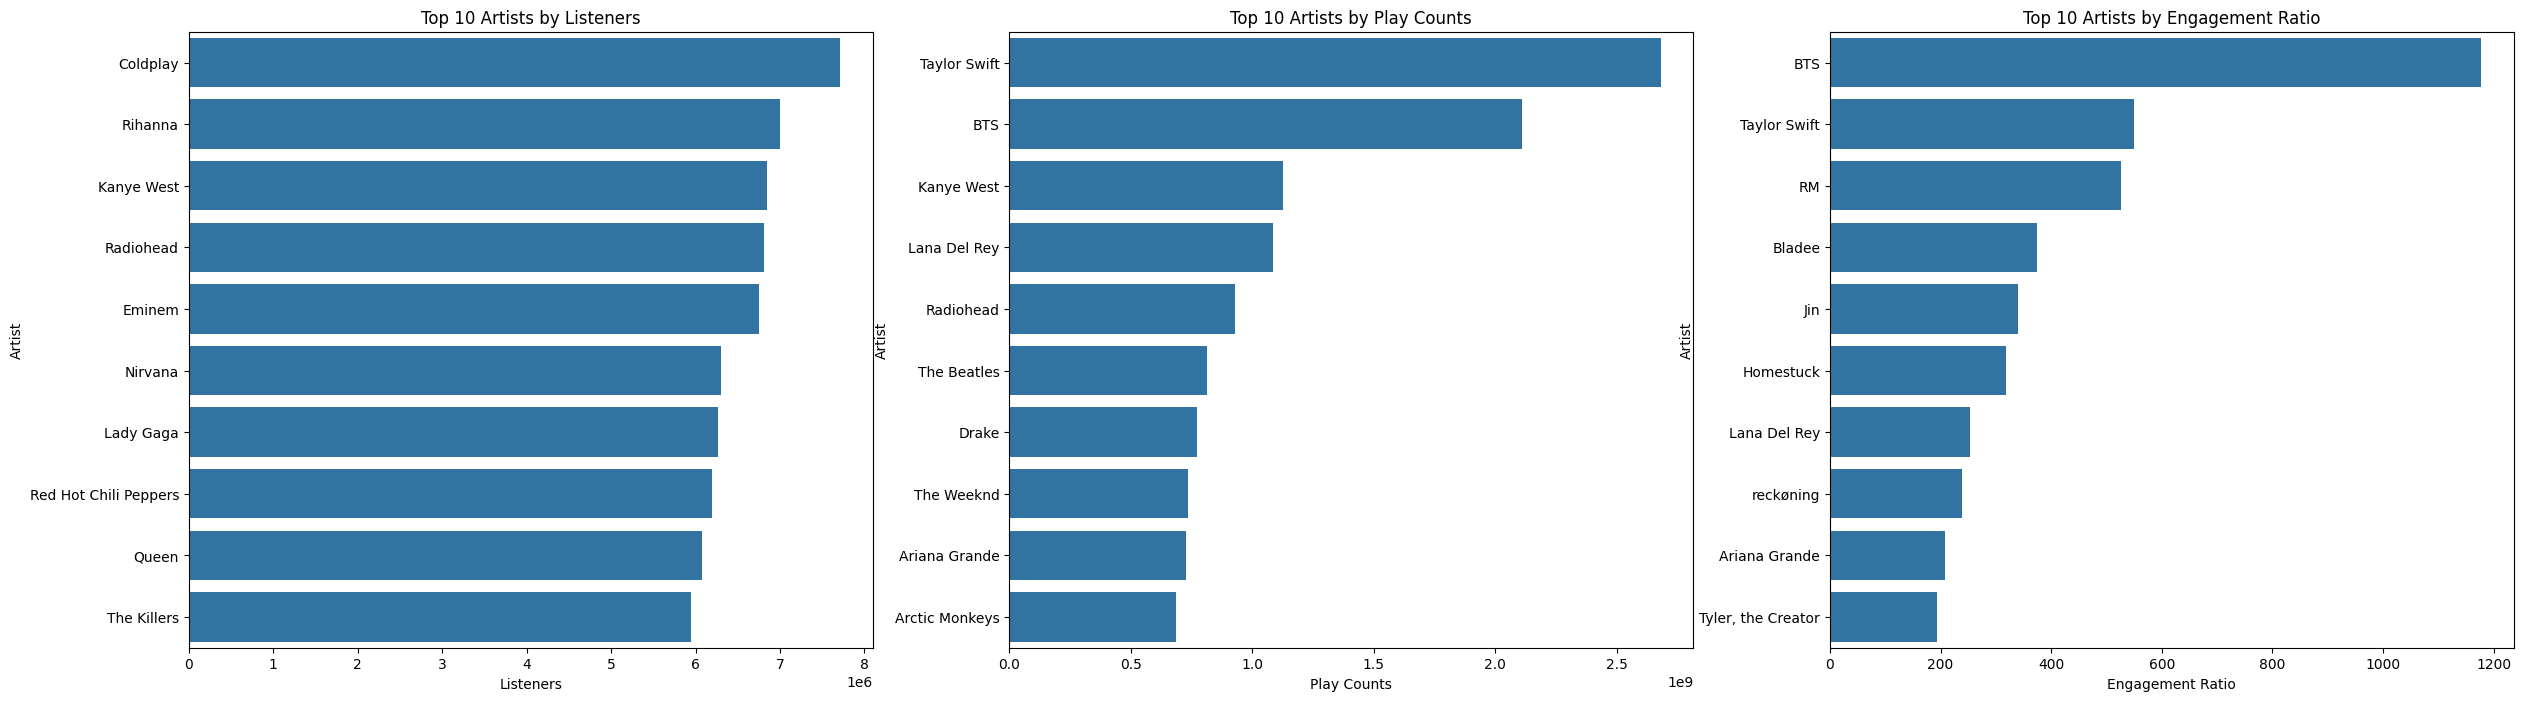

<Figure size 640x480 with 0 Axes>

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8))  # Side-by-side bar plots

# Top 10 artists by listeners
top_listeners = data.nlargest(10, 'listeners')
sns.barplot(x='listeners', y='Name', data=top_listeners, ax=axes[0])
axes[0].set_title('Top 10 Artists by Listeners')
axes[0].set_xlabel('Listeners')
axes[0].set_ylabel('Artist')

# Top 10 artists by play counts
top_play_counts = data.nlargest(10, 'play_counts')
sns.barplot(x='play_counts', y='Name', data=top_play_counts, ax=axes[1])
axes[1].set_title('Top 10 Artists by Play Counts')
axes[1].set_xlabel('Play Counts')
axes[1].set_ylabel('Artist')

# Engagement Ratio
data['engagement_ratio'] = data['play_counts'] / data['listeners']
top_engaged = data.nlargest(10, 'engagement_ratio')
sns.barplot(x='engagement_ratio', y='Name', data=top_engaged)
plt.title('Top 10 Artists by Engagement Ratio')
plt.xlabel('Engagement Ratio')
plt.ylabel('Artist')
plt.show()


plt.tight_layout()
plt.show()

Significance for 1 & 2: Highlights the most popular artists based on listener count and play counts.

Background: These metrics are direct indicators of an artist's global
popularity and engagement.

Interpretation:

The difference between the top artists' listener and play counts reveals how engaged the audience is For eg. Artist "Taylor Swift" has fewer listeners (as not in top 10 artists by listners) but has the highest play counts due to loyal fans base.


Significance for 3: Captures audience loyalty by calculating how many times, on average, a listener plays the artist's music.

Background: A high engagement ratio suggests strong fan loyalty, while a low ratio may indicate casual listeners.

Interpretation:

Artists with a high engagement ratio are more likely to have a dedicated fanbase.
Visualizing these helps identify artists whose audiences are more invested in their music.

Combined Interpretation:
Listener Reach vs Engagement:

Artists like Coldplay and Rihanna have large listener bases but are absent from the engagement ratio chart, indicating casual or one-time listeners.
Artists like BTS and Taylor Swift excel in both listeners and engagement, showcasing their ability to attract and maintain highly engaged audiences.
Outliers in Engagement:

Bladee, Homestuck, and Tyler, the Creator reflect the power of niche audiences, where fewer listeners result in disproportionately high play counts.
Implications for Marketing:

High engagement ratios suggest potential areas for growth in monetization, such as exclusive content or merchandise targeting these dedicated audiences.
Broad listener reach indicates mainstream appeal, where artists can target casual listeners with collaborations or mainstream platforms.

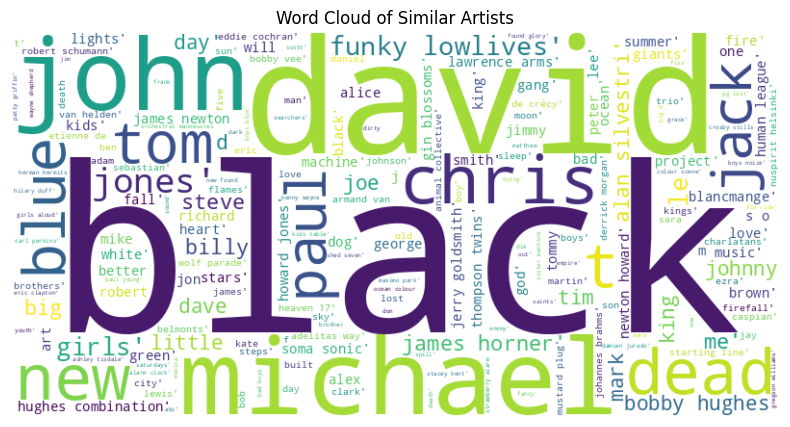

In [35]:
# Word Cloud for Similar Artists
from wordcloud import WordCloud, STOPWORDS

# Define stopwords to exclude - will no longer appear in the word cloud, to make it more focused on actual artist names
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['band', 'orchestra', 'the', 'and', 'group', 'ensemble', 'dj', "band'", "orchestra'","club'", 'club'])

# Combine all similar artist names into one string
similar_artists = ' '.join(data['similar_artist'].str.replace(r"[\[\]',]", '').str.lower())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(similar_artists)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Similar Artists')
plt.show()

Significance: Shows the most commonly associated artists across the dataset.

Background: Similar artists indicate a music network or genre proximity.

Interpretation: Larger words represent frequently mentioned artists, indicating central figures in the music industry or within a genre.

Observation
The most prominent words in the word cloud are "David," "Michael," "Black," "John," "Jack," and "Paul."
Other medium-sized names like "Chris," "Tom," "Billy," and "Blue" also stand out.
Several smaller names and phrases like "girls," "funky," and "dead" are scattered, but their frequency is significantly lower.

Analysis
Frequent Artist Names:
The prominence of names like David, Michael, John, and Paul suggests these names are commonly linked as similar artists across the dataset.
These names may reflect a large number of artists with these names or artists known for collaborating or influencing others.

Genre or Style Influence:
The presence of words like "funky" and "blue" hints at genre-specific associations (e.g., funk, blues, or jazz artists).
The recurring names may indicate common genres that tie artists together.

Impact of Common Words:
Some larger words like "black" and "dead" may be generic phrases or band names, such as "Black Sabbath" or "Grateful Dead."
Words like "girls" might hint at specific band names (e.g., "Girls Aloud" or "Indigo Girls") or thematic connections.

Niche Popularity:
Smaller names and words like "Alan Silvestri" or "Johnny" may indicate niche artists or contributors whose influence is lesser but still significant.

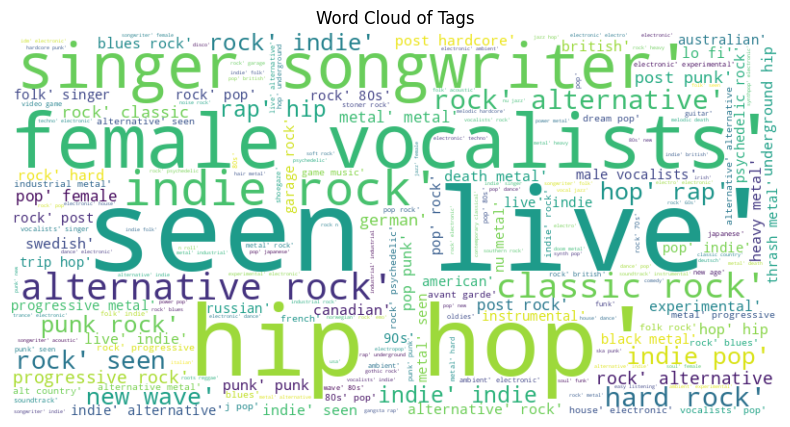

In [62]:
#Most Common tags

tags = ' '.join(data['tags'].str.replace(r"[\[\]',]", '').str.lower())
tag_cloud = WordCloud(width=800, height=400, background_color='white').generate(tags)

plt.figure(figsize=(10, 5))
plt.imshow(tag_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()

ignificance: Identifies dominant genres or styles among artists.

Background: Tags provide insights into how music is categorized, aiding in understanding genre trends.

Interpretation:

Dominant tags indicate popular genres.
Comparing the word cloud to listener data can reveal if certain genres attract larger audiences.

Observation
Dominant Tags:
The most prominent tags include "hip hop," "seen live," "female vocalists," "indie rock," "alternative rock," "singer-songwriter," and "rock."
Other significant tags are "classic rock," "punk," "hard rock," and "new wave."

Smaller Tags:
Less frequent tags like "death metal," "blues rock," "experimental," "post-rock," and "progressive rock" appear as smaller text.

Analysis
Most Popular Genres and Styles:
Hip Hop:
Its prominence reflects the genre's massive global popularity and cultural influence.
Rock and Subgenres:
Tags like "indie rock," "alternative rock," "classic rock," "punk," and "hard rock" indicate rock’s enduring popularity across its many subgenres.
Singer-Songwriters and Female Vocalists:
The significant size of these tags reflects a focus on individual artists or vocal-centric music, particularly genres like indie, folk, or pop.

"Seen Live" Tag:
The large presence of "seen live" suggests many listeners associate music with live performance experiences, possibly indicating that live music is a key factor for audience connection and tagging behavior.

Diversity of Genres:
The presence of smaller tags like "death metal," "progressive rock," "trip-hop," and "post-rock" shows that niche and experimental genres have a smaller but dedicated following.

Gender Representation:
The tag "female vocalists" highlights the recognition of female-led music, often associated with genres like pop, indie, and alternative.

Temporal Trends:
Tags like "classic rock" and "new wave" suggest music from earlier decades still holds relevance, appealing to both older and younger generations.

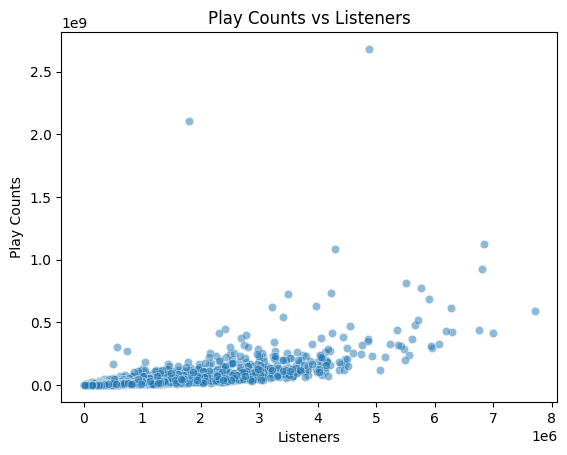

In [36]:
sns.scatterplot(x='listeners', y='play_counts', data=data, alpha=0.5)
plt.title('Play Counts vs Listeners')
plt.xlabel('Listeners')
plt.ylabel('Play Counts')
plt.show()

Significance: Highlights the relationship between audience size (listeners) and their activity (play counts).

Background: In music analytics, higher play counts per listener indicate a dedicated audience.

Interpretation:
A strong correlation (linear trend) suggests that play counts scale with listeners.
Outliers with high play counts but low listeners are worth investigating as they may indicate a niche but highly engaged audience.

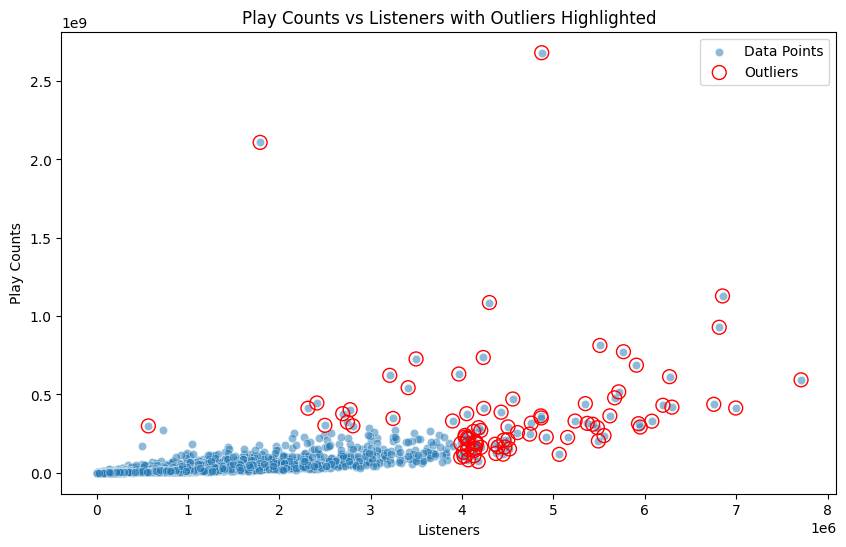

In [45]:
import numpy as np

# Define thresholds for outliers (e.g., using z-scores)
from scipy.stats import zscore

#Z-Score for Outliers:  a statistical measurement of a score's relationship to the mean in a group of scores.
#Z-scores standardize data, making it easier to identify outliers.
#Data points with a z-score > 3 (or < -3) are considered outliers.
# General in trading, a Z-score of -3.0 to 3.0 is used, suggests that a stock is trading within three standard deviations of its mean

# Calculate z-scores for listeners and play counts
data['listeners_zscore'] = zscore(data['listeners'])
data['play_counts_zscore'] = zscore(data['play_counts'])

# Define outliers as data points with z-scores > 8 (or other threshold)
outliers = data[(np.abs(data['listeners_zscore']) > 5.5) | (np.abs(data['play_counts_zscore']) > 5.5)]

# Scatter plot with outliers circled
plt.figure(figsize=(10, 6))

# Scatter plot for all data points
sns.scatterplot(x='listeners', y='play_counts', data=data, alpha=0.5, label='Data Points')

# Highlight outliers with circles
plt.scatter(outliers['listeners'], outliers['play_counts'], edgecolor='red', facecolor='none', s=100, label='Outliers')

# Add titles and labels
plt.title('Play Counts vs Listeners with Outliers Highlighted')
plt.xlabel('Listeners')
plt.ylabel('Play Counts')
plt.legend()

plt.show()


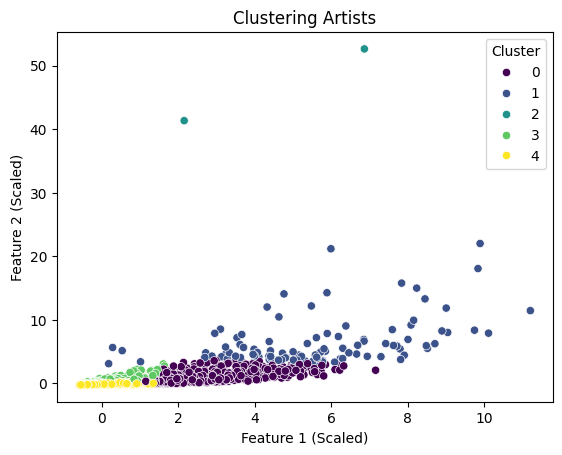

In [66]:
#Clustering Artist by features

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data[['listeners', 'play_counts', 'engagement_ratio']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['cluster'], palette='viridis')
plt.title('Clustering Artists')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.show()


Significance: Groups artists with similar metrics, helping uncover patterns or niches.

Background: Clustering identifies groups of artists based on popularity and engagement.

Interpretation:

Clusters can represent groups like "superstars," "emerging artists," or "dedicated fanbase artists."

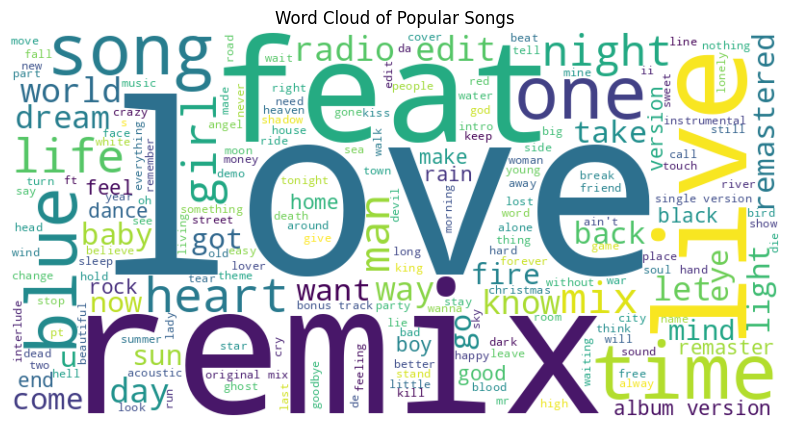

In [67]:
#Popular Song word cloud
songs = ' '.join(data['top_songs'].str.replace(r"[\[\]',]", '').str.lower())
song_cloud = WordCloud(width=800, height=400, background_color='white').generate(songs)

plt.figure(figsize=(10, 5))
plt.imshow(song_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Popular Songs')
plt.show()

Significance: Highlights frequently mentioned song titles.

Background: Song popularity indicates an artist's contribution to their fame.

Interpretation:

Frequent songs represent iconic or viral hits.
Comparing this word cloud with listener data provides insights into song impact.

Observation
Dominant Words:
The most prominent words include "love," "remix," "feat," "song," "blue," "life," "heart," and "time."
Other notable words are "girl," "tone," "man," "day," "night," "baby," and "radio."

Common Themes:
Words like "love," "heart," and "life" indicate a strong focus on emotions and universal themes.
Words such as "remix" and "feat" suggest a trend of collaboration and reimagining existing songs.

Smaller Words:
Words like "fire," "rain," "dream," "home," and "light" add to the diversity of lyrical themes and song titles.

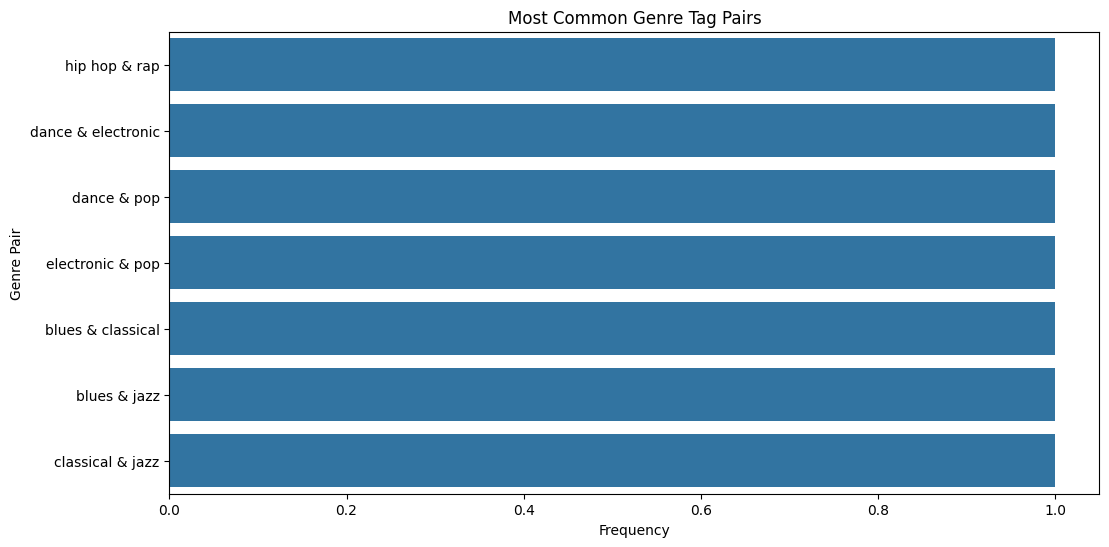

In [81]:
import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.DataFrame({
    'tags': [
        "['Hip Hop', 'Rap', 'Seen Live']",
        "['Rock', 'Alternative Rock', 'Favorite']",
        "['Pop', 'Dance', 'Electronic']",
        "['Jazz', 'Blues', 'Classic']",
        "['Metal', 'Heavy Metal', 'Thrash Metal']"
    ]
})

# Define primary genres and their variations
genre_variations = {
    'hip hop': ['hip hop', 'hip-hop', 'hiphop'],
    'rap': ['rap'],
    'rock': ['rock', 'alternative rock', 'alt rock'],
    'pop': ['pop', 'dance pop'],
    'dance': ['dance'],
    'electronic': ['electronic', 'electronica'],
    'jazz': ['jazz'],
    'blues': ['blues'],
    'classical': ['classical', 'classic'],
    'metal': ['metal', 'heavy metal', 'thrash metal'],
    # Add more genres and their variations as needed
}

# Flatten the genre_variations dictionary for easy lookup
genre_lookup = {variation: genre for genre, variations in genre_variations.items() for variation in variations}

# Function to normalize tags
def normalize_tag(tag):
    tag = tag.lower().strip()
    return genre_lookup.get(tag, None)  # Return None if the tag is not a recognized genre

# Function to clean and normalize tags
def clean_and_normalize_tags(tag_string):
    # Remove brackets and quotes
    tags = tag_string.strip("[]").replace("'", "").split(',')
    # Normalize tags
    normalized_tags = [normalize_tag(tag.strip()) for tag in tags]
    # Filter out None values and duplicates
    return list(set(filter(None, normalized_tags)))

# Apply the cleaning and normalization function
data['normalized_tags'] = data['tags'].apply(clean_and_normalize_tags)

# Extract combinations of normalized tags
tag_combinations = data['normalized_tags'].apply(lambda x: list(combinations(sorted(x), 2)))
flat_combinations = [pair for sublist in tag_combinations for pair in sublist]

# Count the most common tag pairs
tag_pair_counts = Counter(flat_combinations).most_common(10)

# Convert tuples to strings for better readability
tag_pairs = pd.DataFrame(tag_pair_counts, columns=['Tag Pair', 'Count'])
tag_pairs['Tag Pair'] = tag_pairs['Tag Pair'].apply(lambda x: ' & '.join(x))

# Plot the most common tag pairs
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Tag Pair', data=tag_pairs)
plt.title('Most Common Genre Tag Pairs')
plt.xlabel('Frequency')
plt.ylabel('Genre Pair')
plt.show()


Discover which genre tags often appear together, hinting at genre crossovers or artist versatility
This reveals relationships between genres (e.g., "hip hop & rap") or how genres are often fused.